# Final Project Report


Lining Mao (LMI7892), Xiaotian Ma (xma6781), Zeqiu Yu (ZYV9962)

## Abstract

Edvard Munch, a norwegian painter thrived in late 19th century, is now known for abstracting the post-impressionist genre and technique through contrasting lines, colored blocks, and exaggerated shapes. The distinguished features of Munch's paintings fit into a classical engineering problem, that is, how can we teach computer 'art'. Or, in another words, how can we let computer know genre or style. Recent development in deep learning, specifically with CNN or GAN struture, shows unprecedented results of image style extraction. In this project, we are interested in learning these new approaches in the implementation level and see how much art can be understood by machine.

# Introduction

There is a saying that art is just engineering or science not yet understood. Human anatomy was mainly in philosophical debates or aesthetics dialogues back in the Renaissance, but now it is in the domain of medical science. We can see similar process in music, paint or dance. Despite all the philosophical conversation about the dichotomy of art and sciecnce, efforts are still made towards understanding arts through means of science and engineering. And our project aims to understanding part of that effort. In particular, we hope to teach computer Edvard Munch's style and transfer to other paintings. We will use the data collection of all his paintings available. And the final goal is to build a generative model that can generate Munch's style painting. Which can be seen as a subproblem of supervised machine learning.

With the initial goal of learning the style of Munch's image, we explored image classification method along with generative method. To reach all the trunk and branches we caught interested along the way, we eventually used three datasets, Monet's painting dataset, Munch's painting dataset and a natural image dataset. And we achieve great results in classification and descent results in generation. 


# Datasets:

From the kaggle tutorial [Introduction to CycleGAN - Monet paintings](https://www.kaggle.com/code/dimitreoliveira/introduction-to-cyclegan-monet-paintings/input) , we downloaded 300 Monet's paintings and 7038 pictures of natural views in jpg format. The pictures and paintings are all in 256×256 resolution which facilitate later experiments.



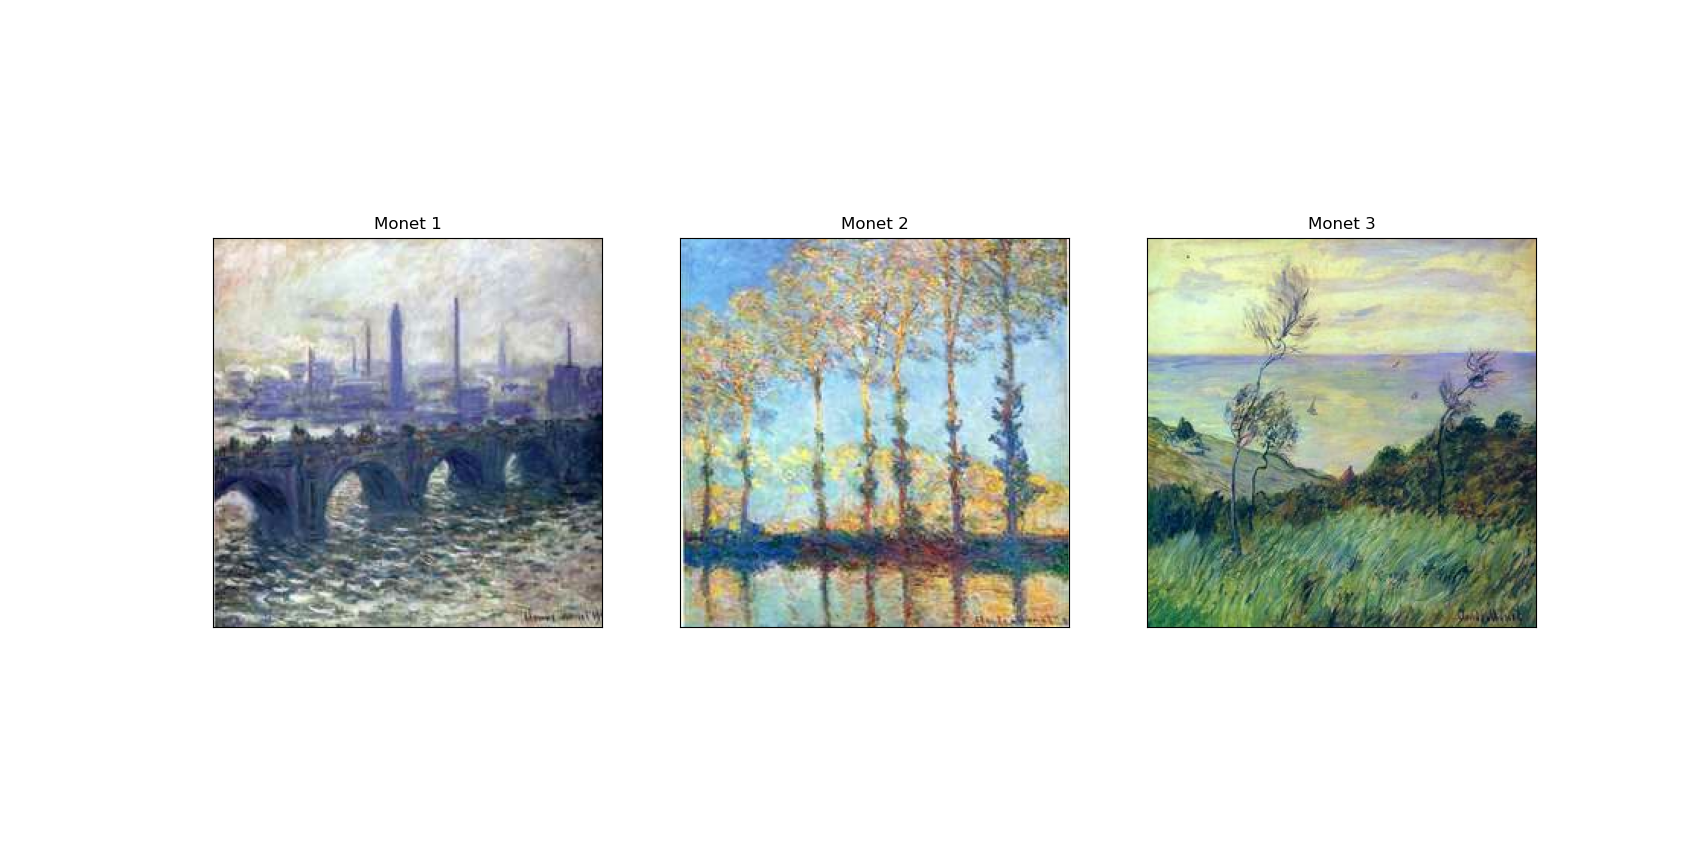

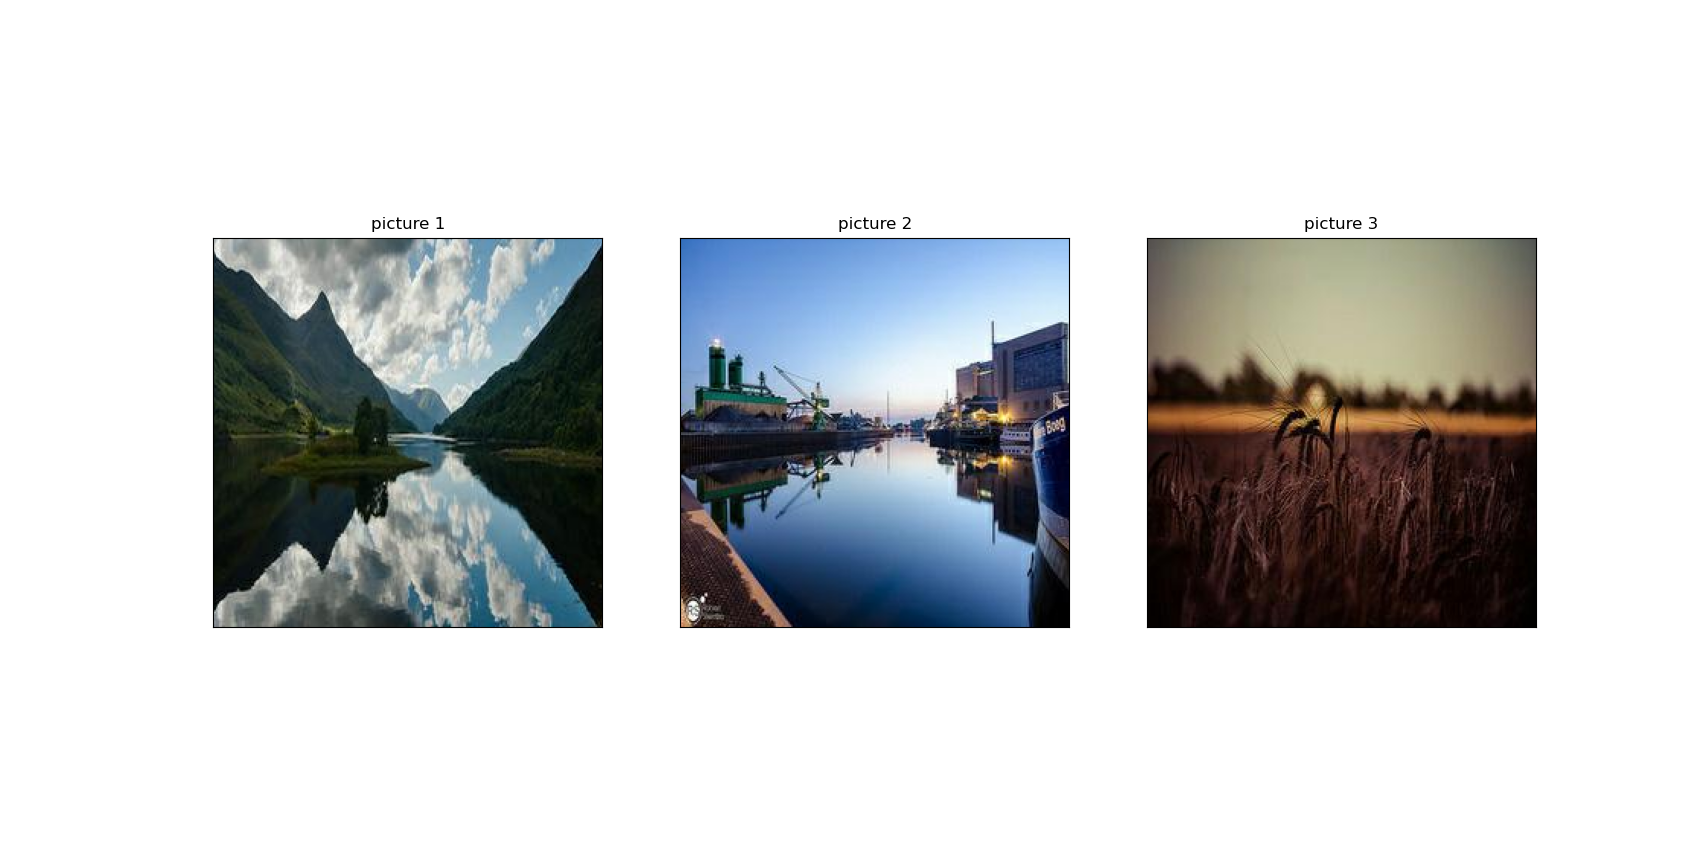

From the kaggle tutorial [Edvard Munch paintings dataset](https://www.kaggle.com/discussions/getting-started/377989) , we downloaded 1770 Munch paintings in jpg. However these paintings are in all kind of size which is troublesome. After looking into data augmentation, we tried adding a global average pooling layer before the fully connected layers saldly it didnt work. We then decide to use OpenCV's `resize` method to convert all the Munch paintings into 256×256 resolution and our model trained fine on these.


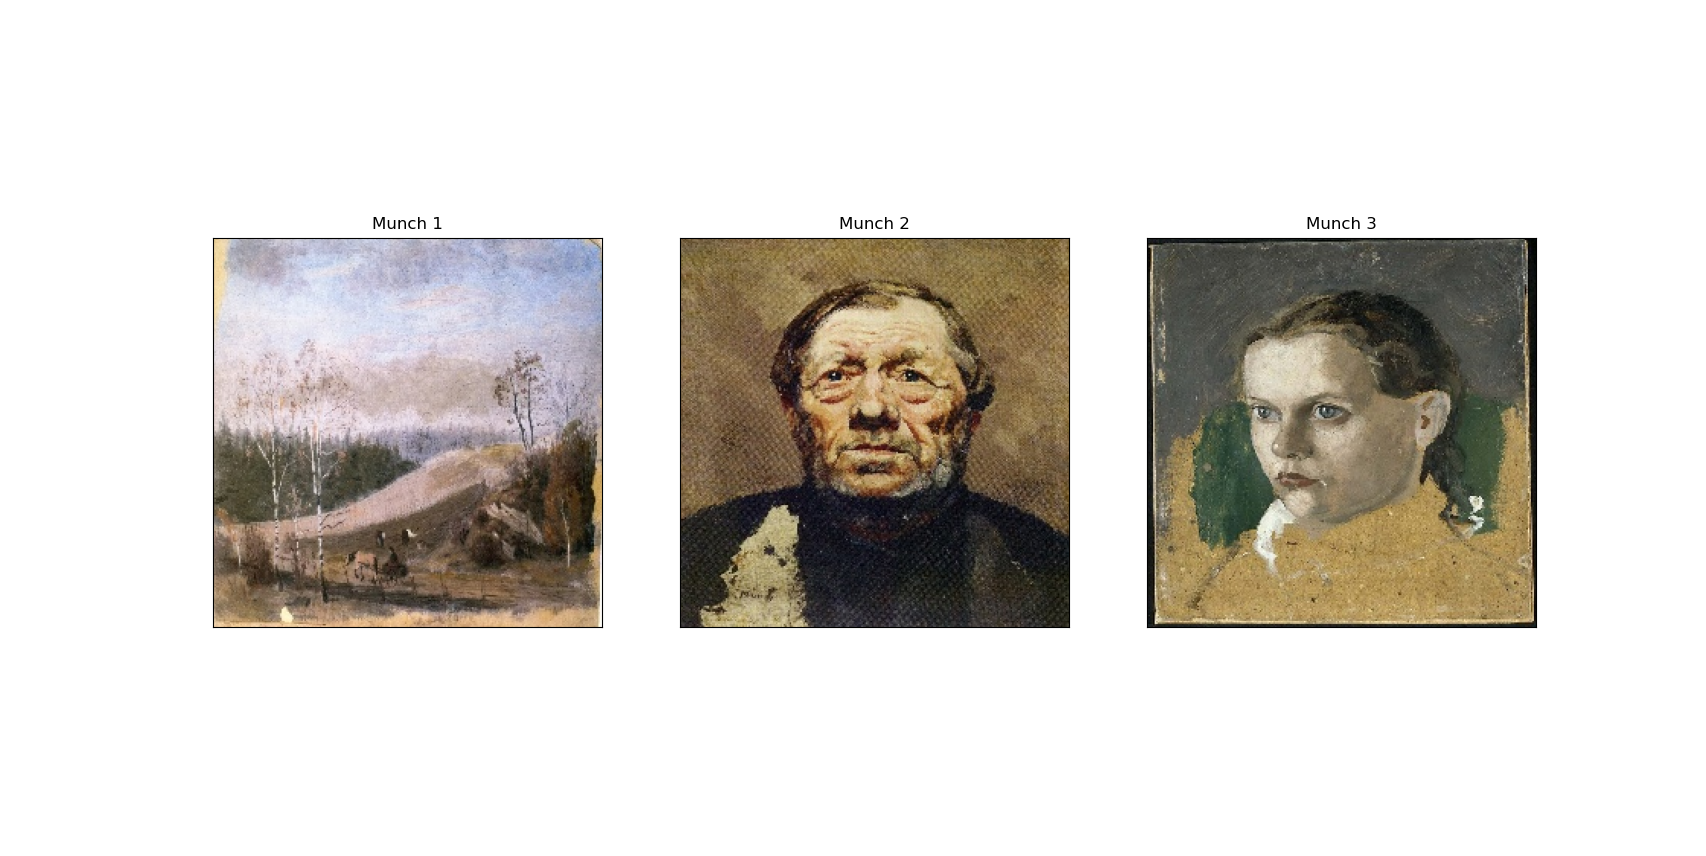

# Goals and diccusions

### Essential Goals:

**1: Build a model that can differentiate the painting of Monet and Munch.**

This is preliminary data preprocessing and modelling for us, for the sake of familiarize data source and team collaboration dynamics. Binary classification of two painter's painting is a easy goal. Due to the drastic difference in style and object of the two paitners, we achieved  classification result by using CNN only and even better performance with ResNet architecture. As shown by the two traces attached.

CNN:

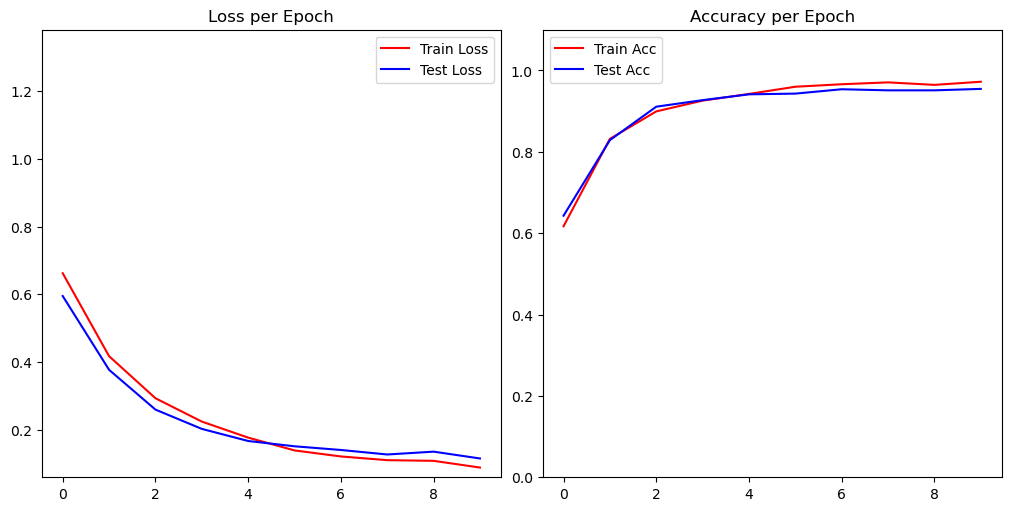

ResNet:

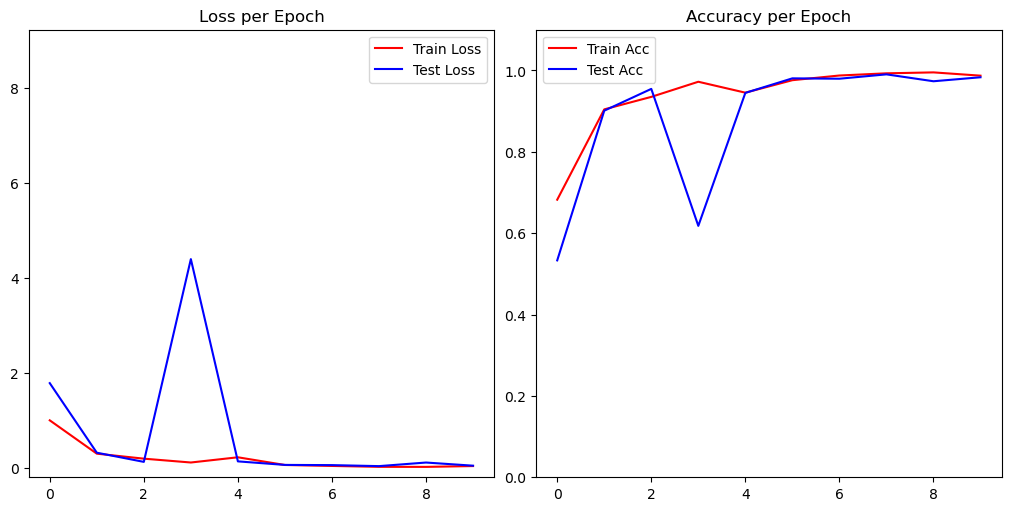

**2: Find a more effective evaluation method to score the GAN Model.**

When we structured the project, we imaged that there should be a metric to evaluate the generative styled image. So we researched about many popular GAN score system, including Fréchet Inception Distance(FID), Kernel Inception Distance(KID), Inception Score, etc. Then we find out there isn't any particular score available for the generative style image. The final quality of the generative model can only be evaluated subjectively. Seems like some aspect of art or creativity still cannot be comprehended by mathematics and engineering.


**3: Find some adversarial examples of our trained style transfer model.**

As before, when we planned out the project, we presumed that the trained GAN model would generate images with quality that match the pretty demo showed online. Thus we wondered if we can find a certain styled image or structured image that can break the generation process of our model. It later turns out that it is super hard to train a good style transfer model and it is highly depend on the object present and specific style. And there are many adversarial examples of our trained model, presented in later section. 

### Desired Goals:  


**Trying to get the best image classification model for our case.**

This desired Goal is a slight extension upon the first essential goal. We trained many different network architectures of CNN and some variations of ResNet, but the resultant error doesn't differ too much and there isn't much evidence that increasing the complexity model would help improving the generalization ability. Since this isn't the main body of our project, we didn't dewell on it for too long, instead focus on the generative part.

**Train a Style transfer model for Munch's painting.**

This is the main body of our project, aiming to learn the style of Munch's painting and generate a painting based on a natural image. Through reading some literature review, we decided to use Cycle GAN as our main model. With a series of training and tuning, the sampled image comparison is attached below. At the first sight, the imaged generative is not really satisfactory, but this is best we can achieve using this model structure and datasets. Observing the paired output, we found that the model does a better job at transforming the natural image to painting style than the converse. I suspect that this is due to the abundance of portraits in Munch's datasets, failing the trained model to learn the style of natural landscape. To see if the subject difference in two image sets results in phenomenon, we decided to use Monet's painting data to fit Cycle GAN because it mainly consists of natural landscape. As shown in the attached images, the resultant transformed pairs indeed looks better than those trained on Munch's, especially the generated natural image based on paintings. 

Munch:

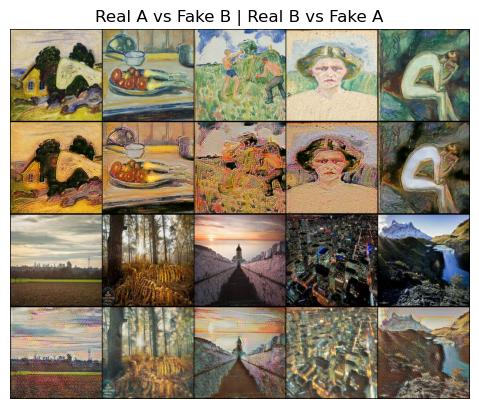

Monet:

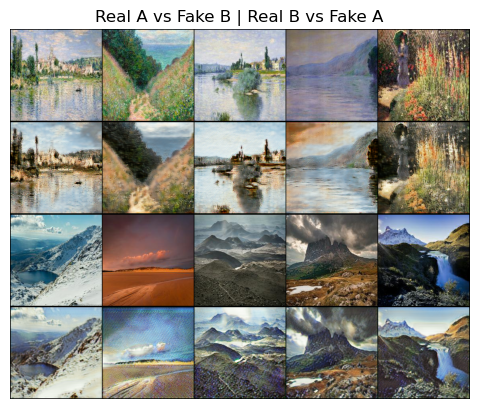

### Stretch Goals:


**1. Compare the performance and difficulty in training different generative models.** 

Cycle-GAN is hard to train but the result generated by Cycle-GAN is much better from intuitive perspective, the bottleneck is that we are struggling with finding a criterion to decide the style similarity of the images. However, in comparision with the use of the models. We use Cycle-GAN to learn the style from Munch and include nearly all of the input paintings. Then, we use VGG to learn the style of a particular painting. It is quite different, to improve it we have done something new to VGG in everything else part.
As shown in the following images, first two are from VGG and the others are from Cycle-Gan.
Also, for the models to do classification. We used the model from the class (Basic CNN) and ResNet50. As mentioned in the essential goal, the classification task is not difficult. Resnet beats basic CNN by accuracy and basic CNN is easier to train for ResNet50. When the classification task is much harder, to increase the depth and meantime to decrease the training time, we can consider ResNet50.


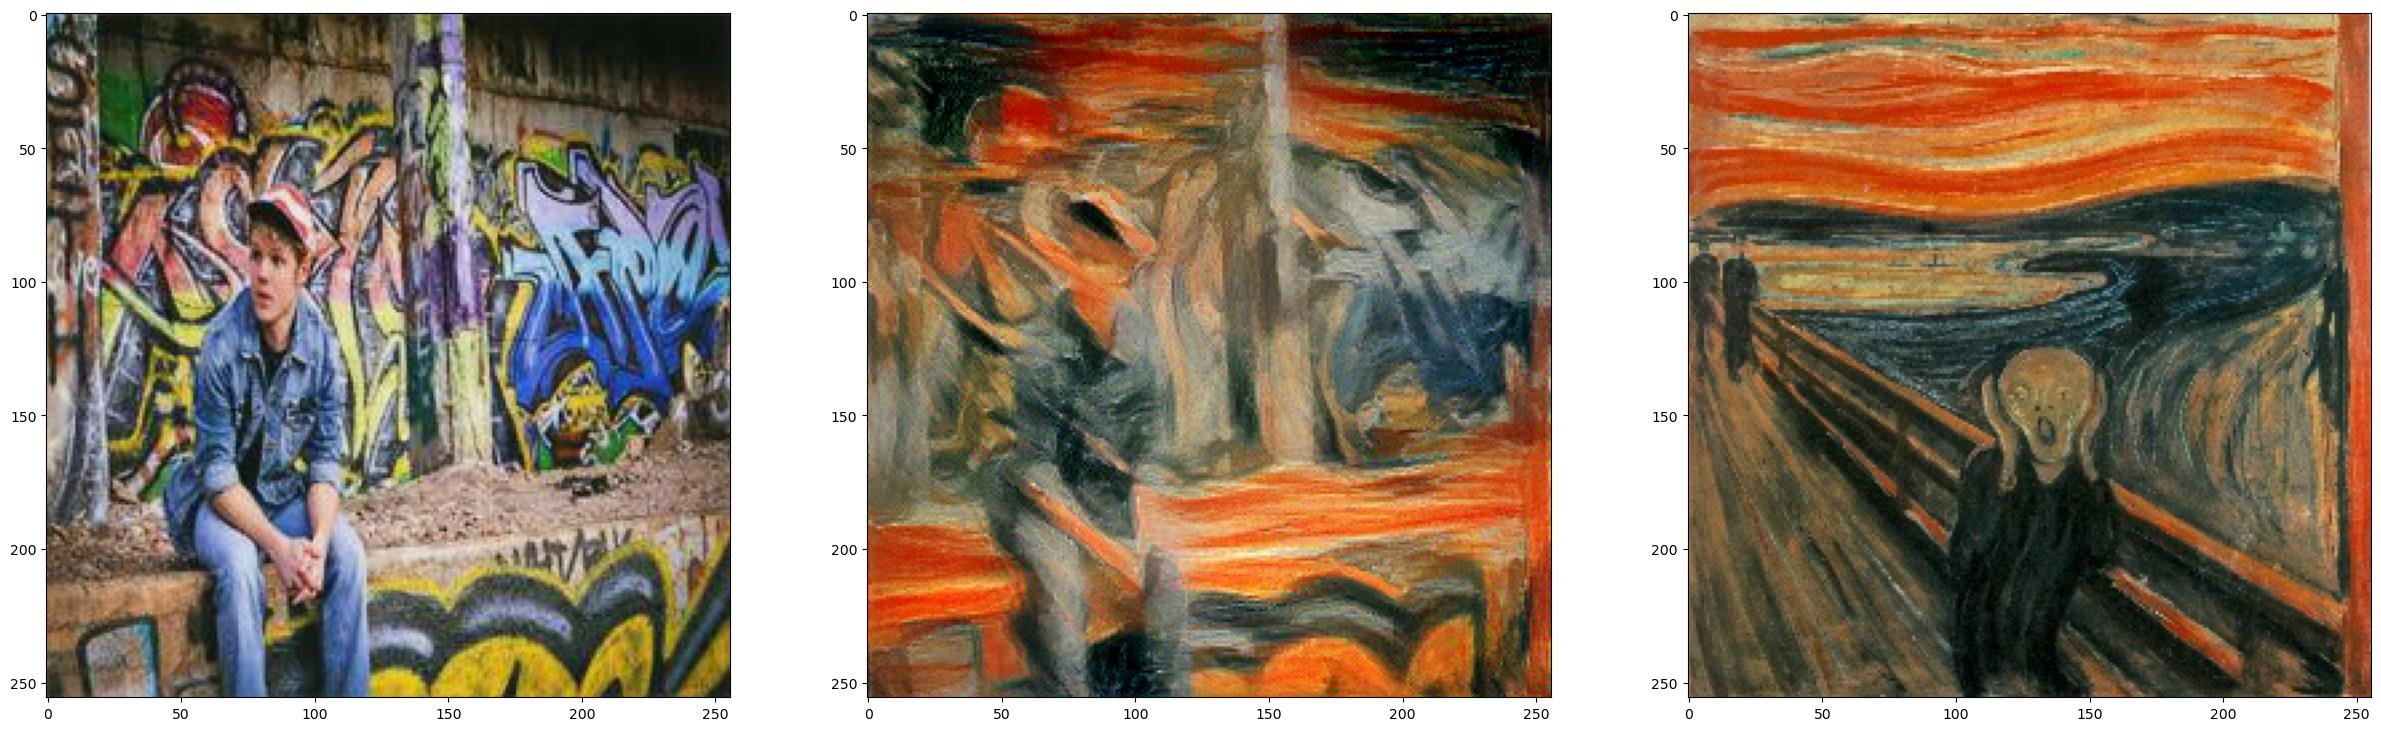

2: **Improve the robustness of the models, so that they are able to distinguish a Munch's paiting with colorless input or half a painting.**

We abandoned this goal because we don't want to further developed on classification model for this problam. And also this goal lacks intrinsic motivation benefits. What's the use of this model even if we achieved a good performance. 

3: **Transform colorless picture to paintings in Munch's style (with coloring)**

We consider this as a fun extension to investigate the performance of our Cycle GAN. By encoding the natural images as greyscale, we feed them into the GAN along with paintings. The generated paint style natural image still assembles to the painting. Results are attached. 

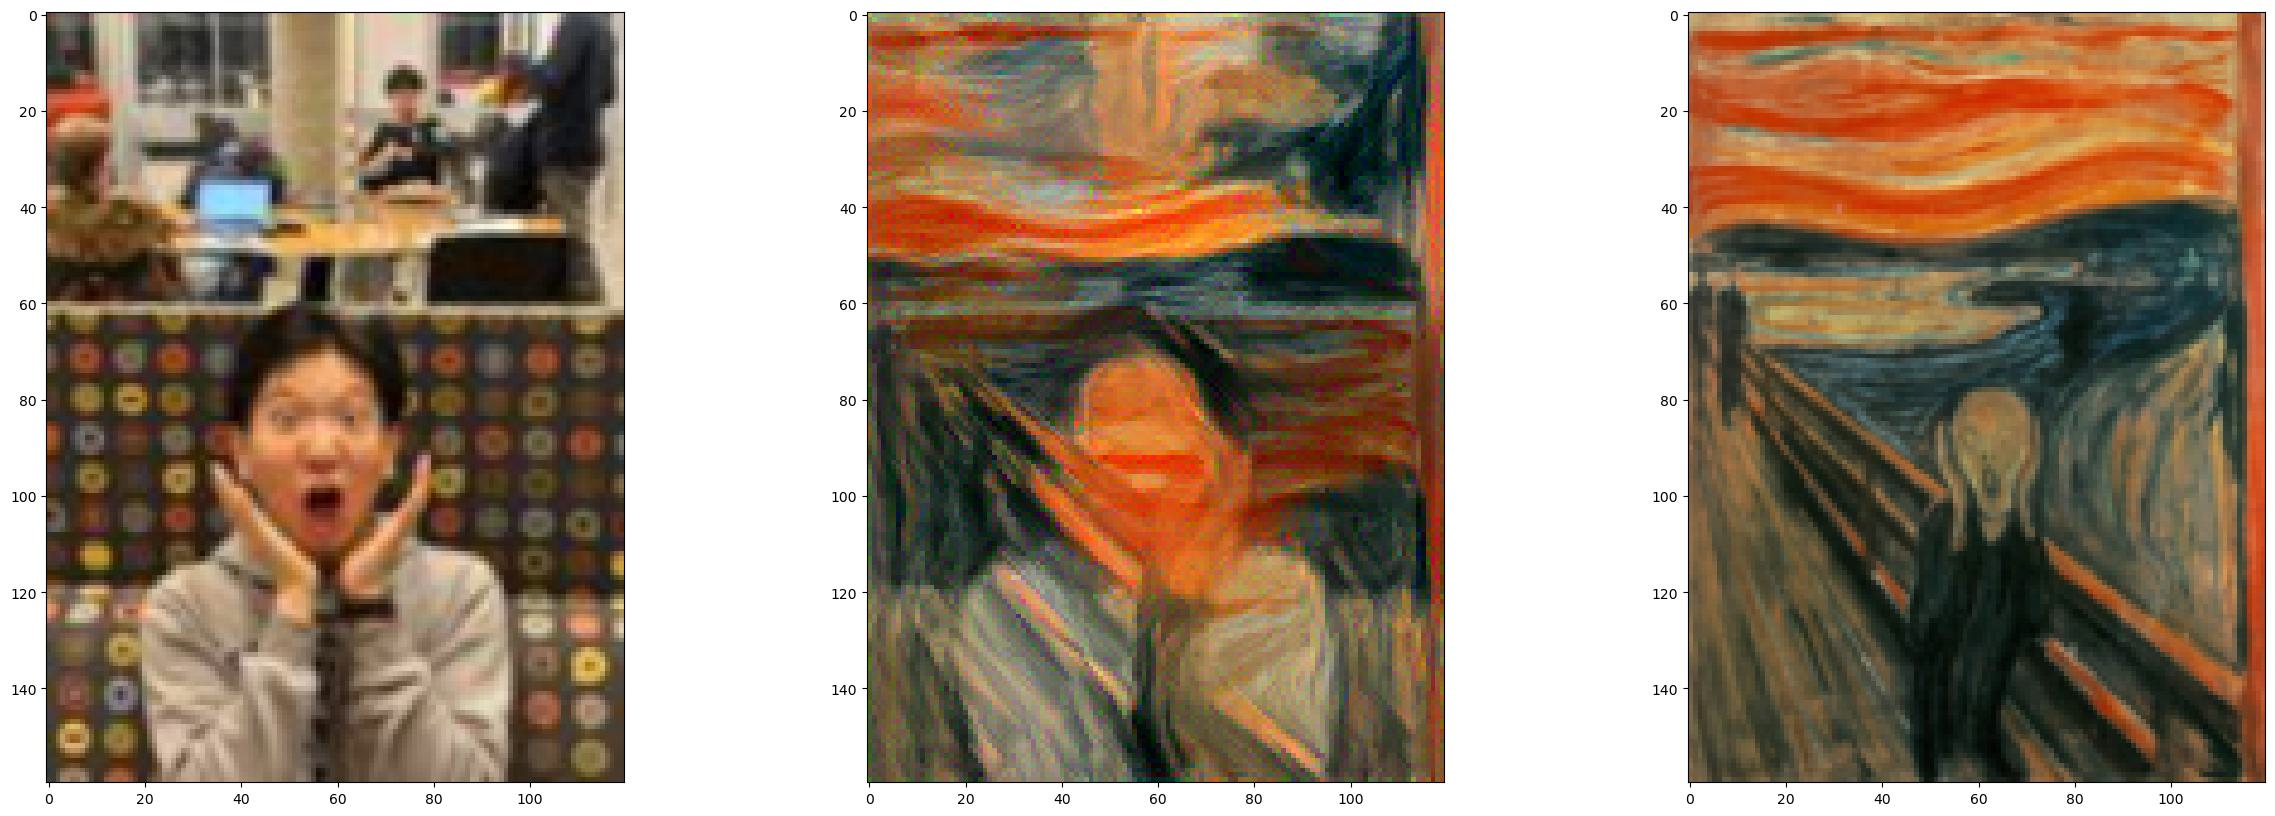

### Everything Else:  
As mentioned in Stretch goals, we can use VGG to learn a particular paintings. Because a large number of Munch's paintings are portraits and according to the feature of VGG, we are figuring out whether our current model can identify eyes and other features. The short answer is no. Our model has 5 convolutional layers, the 4-th layer studies the color and style features, and we only consider the loss of this layer by using Gram matrix to realize style transforming. As explained by Visualizing and Understanding Convolutional Networks (Zeiler, 2013), we are currently trying to use deconvolution method to find the effect of each layer and wish to find the layer with methods to find the key characters of human. In this way, we can achieve better transforming results than just changing the colors and lines.

# Code and documentation:  

All the codes are in three file:

Styletransfer.ipynb ; Main file for CycleGAN


Classfication.ipynb ; Main file for classification task, including CNN and ResNet


vgg-image-transfer.ipynb ; Main file for VGG style transfer

# Reflections:  
  

## What was interesting?  
  
The generative model can capture the image set's general hue and tone, but it is not easy to capture what really distinguishs painting and natural image, the texture. We wondered if there is a certain structure that can help convert the characteristic brushstroke to pixel or pixel gorup to brushstroke. If so, can machine really differentiate the style in a microscopic level? Instead of taking a hollistic view of the painting to make a decision, if machine can tell the autheticity through only a frame corner?

In addition, we can also consider some possible deployment of the Cycle GAN model. If the trained model can be distilled into a lighter version to fit the computational capacity of a mobile device? So that the forward and backward transformation can be a handy tool for instant photo transformation. Also for this implication, maybe a lighter version of VGG can be used for specific photo transformation.


## What was difficult?  

One of the main difficulty is setting up the online coding environment that can be easilty shared and interacted among the group members. All the version collision and online data storage and retreive gave us much trouble. Also getting the big model like a CycleGAN to run requires quite a lot back and forth debugging process. 

  

## What's left to do?  
How to evaluate the performance of the CycleGAN on style transforming task still remains a problem. To formulate a mathematical loss to evaluate the the goodness of generative styled image would not be far from explaining art with the language of math. The impact will be significant.

We noticed that our model performed significantly better on certain pictures than the others. This is most likely due to the subject matter, which the artist often works on, coincide with these pictures. (Chen et al., 2021) proposed a method called arCycleGAN introducing the mechanism of attribute registration into CycleGAN to match the characteristics of the styled images and the imitated images. Further experiment on applying this to our training seems interesting and promising.





# References


*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

Gatys, L. A., Ecker, A. S., &amp; Bethge, M. (2016). Image style transfer using Convolutional Neural Networks. 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR). https://doi.org/10.1109/cvpr.2016.265 

Zeiler, M.D., Fergus, R. (2014). Visualizing and Understanding Convolutional Networks. In: Fleet, D., Pajdla, T., Schiele, B., Tuytelaars, T. (eds) Computer Vision – ECCV 2014. ECCV 2014. Lecture Notes in Computer Science, vol 8689. Springer, Cham. https://doi.org/10.1007/978-3-319-10590-1_53  
  
Isaienkov, K. (2023, January). Edvard Munch Paintings. Retrieved January 31, 2023 from: https://www.kaggle.com/datasets/isaienkov/edvard-munch-paintings  

Innat (2022, March). Van Gogh Paintings:Art-Work Sample of Vincent. Retrieved Feburary 7, 2023 from: https://www.kaggle.com/datasets/ipythonx/van-gogh-paintings

Jun-Yan Zhu, Taesung Park, Phillip Isola, and Alexei A. Efros. "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks", in IEEE International Conference on Computer Vision (ICCV), 2017.

Roy, P., Ghosh, S., Bhattacharya, S. and Pal, U. (2018). Effects of Degradations on Deep Neural Network Architectures. Retrieved Feburary 8, 2023 from: https://www.kaggle.com/datasets/prasunroy/natural-images